# Arctic Expansion

<img style="float:center;" src="https://arcticexpansion.vse.gmu.edu/sites/arcticexpansion.vsnet.gmu.edu/files/images/header5d2.png" width=800px>

### Known Variables
1. Bathymetry
2. Topography and Bathymetry
3. Topography
4. Landcover
5. Hydrodynamic Sensors/stations
6. Meteorological stations
7. Ice data
8. Climate Models
9. Ice models
---

In [ ]:
import netCDF4 as nc4;from mpl_toolkits.basemap import Basemap
import pathlib as pl;import matplotlib.pyplot as plt;
import numpy as np
import warnings;warnings.filterwarnings("ignore")
path = pl.Path(r'D:\FHRL_work\Projects\arctic\gis\data')

---
## 1. Bathymetry

##### a. [NOAA Nautical Charts](https://charts.noaa.gov/InteractiveCatalog/nrnc.shtml)
    - using the noaa stations to convert between mllw to msl (vdatum does not exist for the northern half of alaska)
    - resolution varies but for this case is at ~350m

this is how to extract depth data from nautical charts 

```python        

import pathlib as pl   
import glob   
import shutil   
import geopandas as gpd   

root = pl.Path(r'\gis\nautical_charts\ENC_ROOT')    
files = list(glob.glob(str(root / '*' / '*.000'), recursive=True))    
files = [pl.Path(f) for f in files]    
os.environ["OGR_S57_OPTIONS"] = "SPLIT_MULTIPOINT=ON,ADD_SOUNDG_DEPTH=ON"     
for file in files:    
    new = file.name.split('.')[0] + '.shp'    
    os.system(f'ogr2ogr -nlt POINT25d -append '\    
              f' {str(path / new)} {str(file)} SOUNDG')      
```     

##### Notes from Andre on merging process   
1. Tool merge for the charts in the screenshot. The merge must be done using only the column depth. If you use all columns and merge its not gonna work because theres numerical columns stored as string

2. For the mask file I did a dissolve tool just in order to merge all small polygons into a big mask (mask_dissolve.tif in the folder)  

3. I clipped the area for only this area in the screenshot above otherwise it was too big for arcgis   

4. Spline with barriers using the points merged (in the folder also) and the column depth, the mask_dissolve was used as barrier. Ideally the nearest neighbor could be the best interpolator for this case however I like the barrier function in arcgis that allows you to control it better   

5. Raster calculator for the result *-1 to get bathymetry in negatives   

6. Result + idw_mllw_all in order to correct the vdatum (the difference between MLLW and MSL must be positive, because MLLW is bellow...)   

7. Erase tool using the same mask to get rid of the inland   

8. raster calculator again using Con([InRaster] >0, 0 , [InRaster]) in order to get rid of all positive values (you can try this one before seven, but sometimes it doesnt work properly)   

9. gdal_translate -of NetCDF   

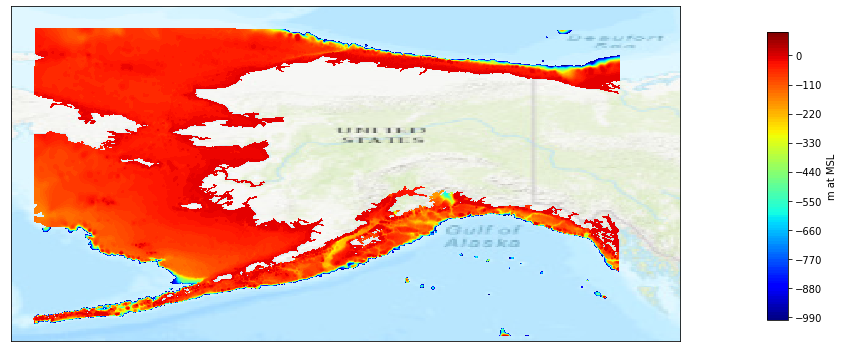

In [2]:
plt.show(fig)

##### b. Other potential data
    - noaa multibeam soundings (via saildrone)


---
## 2. Topography and Bathymetry

##### a. [GEBCO](https://download.gebco.net/)
    - resolution ~450m 
    - vertical datum at meters above geoid (aka MSL)
 

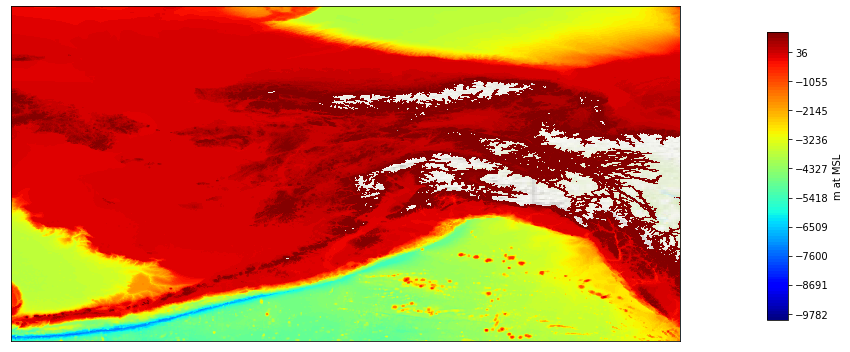

In [12]:
plt.show(fig)

##### b. [GEBCO arctic](https://www.gebco.net/data_and_products/gridded_bathymetry_data/arctic_ocean/)   
    - resolution 200m
    - Horizontal datum in Polar Stereographic. Re-projected to WGS 84 so Ocean Mesh can take it
    - Vertical datum at meters above geoid
    - Added to the GEBCO website in March 2020

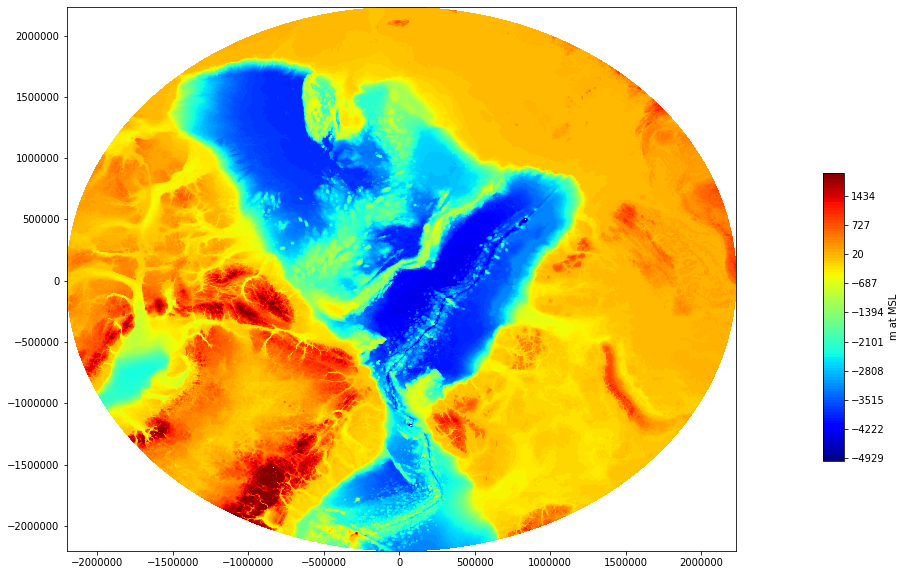

In [2]:
plt.show(fig)

---
## 3. Topography

##### a. USGS    
    a1. Lidar (~10m) 
    - tiles were merged to all of alaska.
    - was resampled to match nautical charts resolution ~340m 
    - using the 5 southern noaa stations to convert between NAVD88 and MSL (most stations do not have navd88 vertical reference in alaska)      
        * assumptions were made for the conversion from NAVD88 to MSL based on the connection between the topography and bathymetry
    

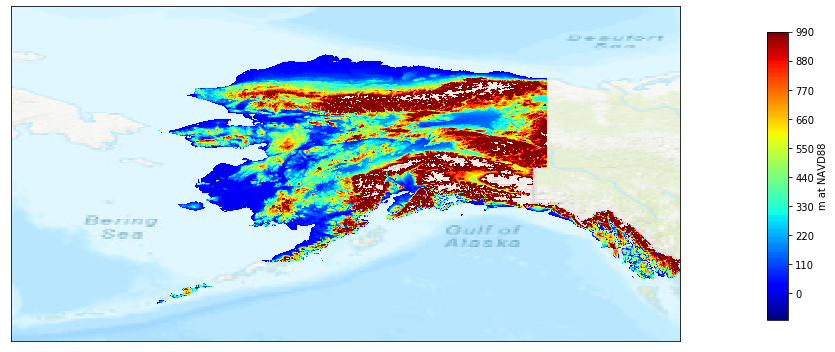

In [2]:
plt.show(fig)

---
## 4. Landcover
##### a. [NLCD](https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/) 
        - 2001
        - 2006
        - 2011
        - Resolution (30m - 60m) depends on which Land cover is chosen
##### b. [Alaska Vegetation and Wetland Composite](https://accs.uaa.alaska.edu/vegetation/mapping/)   
        - document includes descriptions, distribution maps, and images for the 2756 coarse-scale vegetation classes and describes 343 of the 374 fine-scale classes that best represent the range of variation within their parent coarse-scale class. Vegetation classifications and land cover maps such as those provided here represent a framework and baseline on which future monitoring of key natural resources can be structured. As ecologists continue to produce new regional land cover maps, ACCS will update the statewide vegetation map.

---
## 5. Hydrodynamic Stations

##### a. [NOAA Tides and Currents](https://tidesandcurrents.noaa.gov/map/index.html)    

<iframe src="https://tidesandcurrents.noaa.gov/map/index.html?region=Alaska" height="400" width="800"></iframe>

##### b. [Ocean Data Explorer](https://portal.aoos.org/#map)   
<iframe src="https://portal.aoos.org/#map" height="400" width="800"></iframe>

---
## 6. Meteorological Stations   
   
##### a. [NOAA Tides and Currents](https://tidesandcurrents.noaa.gov/map/index.html)   
- Shown in the map above

---
## 7. Ice Data

##### a. [ICESAT-2](https://icesat-2.gsfc.nasa.gov/)
    - The Ice, Cloud, and Land Elevation Satellite-2, or ICESat-2, will measure the height of a changing Earth, one laser pulse at a time, 10,000 laser pulses a second. Launched September 15, 2018, ICESat-2 carries a photon-counting laser altimeter that will allow scientists to measure the elevation of ice sheets, glaciers, sea ice and more - all in unprecedented detail.
    

##### b. [Monthly Sea Ice](https://www.ncdc.noaa.gov/ssmi)   
    - The input data originates from the Defense Meteorological Satellite Program (DMSP), Special Sensor Microwave/Imager (SSM/I) instrument. Researchers at the NOAA/NESDIS/STAR assembled a subsampled, 1/3 degree gridded daily archive of this data. The generation of the monthly products uses these daily fields.   

The following describes the content of the 1 degree gridded files:

1. cfr.yy - Monthly mean cloud fraction (0 - 1.0)
2. ice.yy - Monthly mean sea-ice cover (0 - 100 percent)
3. lwp.yy - Monthly mean liquid water path (1000 * mm)
4. pfr.yy - Monthly mean rain fraction (0 - 1.0)
5. pre.yy - Monthly rainfall (mm)
6. snw.yy - Monthly mean snow cover fraction (0 - 1.0 percent)
7. ssa.yy - Monthly mean sampling fraction (0 - 1.0)
8. win.yy - Monthly mean surface wind speed (m/sec)
9. wvp.yy - Monthly mean total precipitable water (mm)
    
    


##### c. [NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration](https://nsidc.org/data/g02202)    
    - This data set provides a Climate Data Record (CDR) of sea ice concentration from passive microwave data. The CDR algorithm output is a rule-based combination of ice concentration estimates from two well-established algorithms: the NASA Team (NT) algorithm (Cavalieri et al. 1984) and NASA Bootstrap (BT) algorithm (Comiso 1986). The CDR is a consistent, daily and monthly time series of sea ice concentrations from 09 July 1987 through the most recent processing for both the north and south polar regions.

---
## 8. Climate Models


| <span style="font-size:1.25em;"> Model </span>  | <span style="font-size:1.25em;"> Reanalysis    </span> |<span style="font-size:1.25em;"> Real time </span> | <span style="font-size:1.25em;"> Climate Outlook </span>| <span style="font-size:1.25em;"> Description </span>|
| :------------------: |:--------------:|:---------:|:--------------:|-----------------------------|
|[CFSv2](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/climate-forecast-system-version2-cfsv2#CFS%20Reanalysis%20(CFSR))  | <input type="checkbox" checked></input> | <input type="checkbox" unchecked></input> | <input type="checkbox" unchecked></input> | <ul><li> The Climate Forecast System (CFS) is a model representing the global interaction between Earth's oceans, land, and atmosphere.</li></ul> <ul><li> Variable Resolution </li></ul> <ul><li> File type grib2 </li></ul>|
|[ERA 5](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5)   | <input type="checkbox" checked></input> | <input type="checkbox" unchecked></input> | <input type="checkbox" unchecked></input> | <ul><li> ERA5 was produced using 4D-Var data assimilation in CY41R2 of ECMWF’s Integrated Forecast System (IFS), with 137 hybrid sigma/pressure (model) levels in the vertical, with the top level at 0.01 hPa. Atmospheric data are available on these levels and they are also interpolated to 37 pressure, 16 potential temperature and 1 potential vorticity level(s). "Surface or single level" data are also available, containing 2D parameters such as precipitation, 2m temperature, top of atmosphere radiation and vertical integrals over the entire atmosphere. The IFS is coupled to a soil model, the parameters of which are also designated as surface parameters, and an ocean wave model.</li></ul> <ul><li> Resolution 31km or 0.28125&deg; </li></ul> <ul><li> File type grib2 </li></ul> |     
|[Fairbanks modified ERA 5](https://doi.org/10.1175/JAMC-D-15-0153.1)   | <input type="checkbox" checked></input> | <input type="checkbox" unchecked></input> | <input type="checkbox" unchecked></input> | <ul><li> The European Centre for Medium-Range Weather Forecasts interim reanalysis (ERA-Interim) has been downscaled using a regional model covering Alaska at 20-km spatial and hourly temporal resolution for 1979–2013. Stakeholders can utilize these enhanced-resolution data to investigate climate- and weather-related phenomena in Alaska. Temperature and precipitation are analyzed and compared among ERA-Interim, WRF Model downscaling, and in situ observations.  </li></ul> <ul><li>Resolution 20km</li></ul> <ul><li> File type grib2 </li></ul> |
|[GEFS](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-ensemble-forecast-system-gefs)   | <input type="checkbox" unchecked></input> |  <input type="checkbox" checked></input> | <input type="checkbox" unchecked></input>| <ul><li> The Global Ensemble Forecast System (GEFS), previously known as the GFS Global ENSemble (GENS), is a weather forecast model made up of 21 separate forecasts, or ensemble members. The National Centers for Environmental Prediction (NCEP) started the GEFS to address the nature of uncertainty in weather observations, which is used to initialize weather forecast models.</li></ul> <ul><li> Resolution 1&deg; </li></ul> <ul><li> File type grib2 </li></ul> <ul><li>GEFS is produced four times a day with weather forecasts going out to 16 days</li></ul>|
|[GFS](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs)   | <input type="checkbox" checked></input> | <input type="checkbox" checked></input> | <input type="checkbox" unchecked></input> | <ul><li> The Global Forecast System (GFS) is a weather forecast model produced by the National Centers for Environmental Prediction (NCEP). Dozens of atmospheric and land-soil variables are available through this dataset, from temperatures, winds, and precipitation to soil moisture and atmospheric ozone concentration. The entire globe is covered by the GFS at a base horizontal resolution of 18 miles (28 kilometers) between grid points, which is used by the operational forecasters who predict weather out to 16 days in the future. </li></ul> <ul><li> Variable Resolution </li></ul> <ul><li> File type grib </li></ul> |
|[NDGD](https://www.nco.ncep.noaa.gov/pmb/products/rtma/)   | <input type="checkbox" checked></input> | <input type="checkbox" checked></input> | <input type="checkbox" unchecked></input> | <ul><li> The National Digital Guidance Database (NDGD) is a companion set of products to the National Digital Forecast Database (NDFD). NDGD products are guidance used by National Weather Service (NWS) forecasters while preparing official forecasts when using data in the NDFD. The Real-Time Mesoscale Analysis (RTMA) supports NDFD operations and provides analyses to NWS field forecasters. </li></ul> <ul><li> Resolution 3 km </li></ul> <ul><li> File type grib2 </li></ul> |



---
## 9. Ice models
##### a. [Experimental Sea Ice Forecasts](https://www.esrl.noaa.gov/psd/forecasts/seaice/)
##### b. [NCEP MMAB Sea Ice](https://polar.ncep.noaa.gov/seaice/)

---
## Other on-going projects in the Arctic

http://armap.utep.edu/armap_viewer/